Pre requisites

* Install `numpy` and `music21`
* Install `MuseScore` (for seeing music score). Used <https://ftp.osuosl.org/pub/musescore-nightlies/macos/3x/stable/> for Mac

In [6]:
%%time
# Using OG version trained on twinkle twinkle
from simplemelodygen import markovchain

training_data = markovchain.create_training_data()

CPU times: user 262 μs, sys: 48 μs, total: 310 μs
Wall time: 320 μs


In [9]:
%%time
states = [
    ("C5", 1),
    ("D5", 1),
    ("E5", 1),
    ("F5", 1),
    ("G5", 1),
    ("A5", 1),
    ("C5", 2),
    ("D5", 2),
    ("E5", 2),
    ("F5", 2),
    ("G5", 2),
    ("A5", 2),
]
model = markovchain.MarkovChainMelodyGenerator(states)
model.train(training_data)

generated_melody = model.generate(40)

CPU times: user 1.82 ms, sys: 1.23 ms, total: 3.05 ms
Wall time: 2.02 ms


In [15]:
print(generated_melody)

[('E5', 1), ('D5', 1), ('D5', 1), ('C5', 2), ('F5', 1), ('E5', 1), ('D5', 1), ('D5', 1), ('D5', 1), ('D5', 1), ('C5', 2), ('A5', 1), ('A5', 1), ('A5', 1), ('A5', 1), ('G5', 2), ('F5', 1), ('F5', 1), ('F5', 1), ('E5', 1), ('E5', 1), ('E5', 1), ('D5', 1), ('D5', 1), ('C5', 2), ('C5', 1), ('C5', 1), ('G5', 1), ('G5', 1), ('G5', 1), ('A5', 1), ('G5', 2), ('F5', 1), ('E5', 1), ('D5', 1), ('D5', 1), ('D5', 1), ('C5', 2), ('D5', 1), ('D5', 1)]


In [19]:
from music21 import metadata, note, stream

score = stream.Score()
score.metadata = metadata.Metadata(title="Markov Chain Melody")
part = stream.Part()
for n, d in generated_melody:
    part.append(note.Note(n, quarterLength=d))
score.append(part)

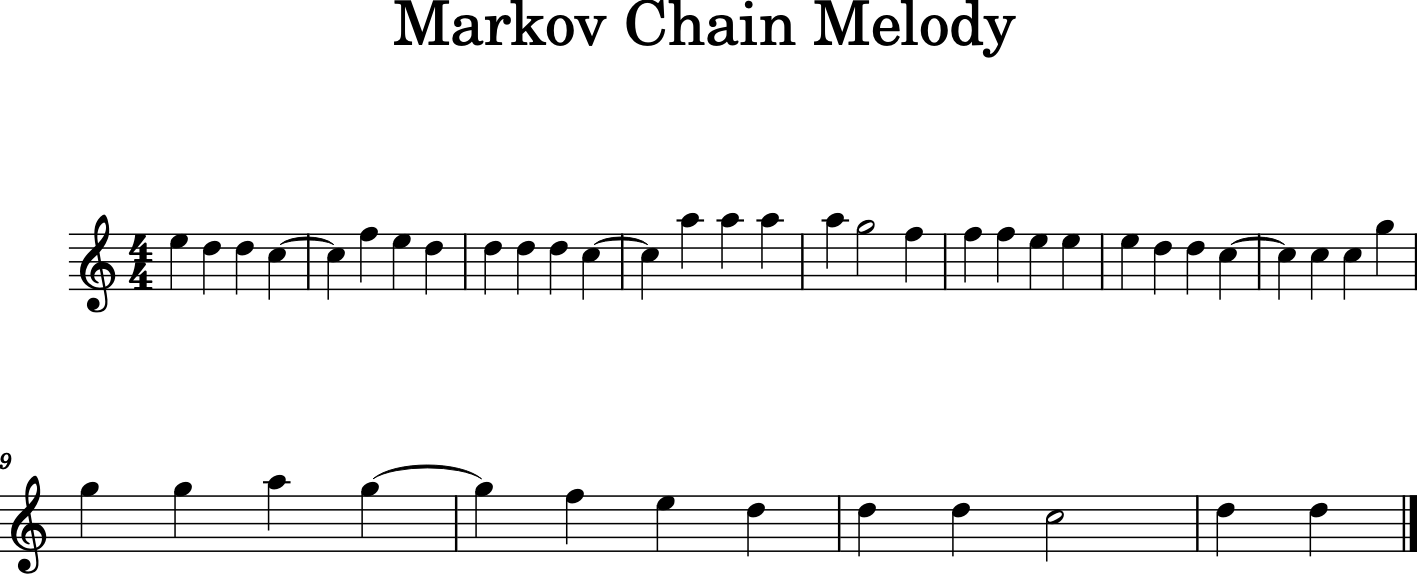

In [20]:
score.show()

In [21]:
score.show('midi')